Importa o modelo a ser fatiado e mapeado

In [2]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Paredes Finas

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

TypeError: 'NoneType' object is not iterable

Contornos

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 2
Total de [Criando Lvls] : 0.8103361129760742
Criando os loops
Total de [Criando os loops] : 0.3688619136810303
Criando regiões de influência
Total de [Criando regiões de influência] : 0.022896766662597656
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.07239818572998047
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:19 maior void:0.002509410288582183Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
Total de [Retirando regiões da camada] : 0.24643754959106445
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em uma unica imagem] : 0.026958703994750977
salvando imagens das regiões
deletado: /L_000/I_000/offsets
Total de [salvando imagens das regiões] : 0.18017888069152832
Total de [Fase 2: Camada: 0] : 1.756183624267578

Pontes

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(n_max, nozzle_diam_internal, folders, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 1.2599103450775146
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 7.066728353500366
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.03634285926818848
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.04644203186035156
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.0005254745483398438
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.187469482421875
Total de [Fase 3: Camada: 0] : 8.666143417358398
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 1.2689402103424072
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 6.013515949249268
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.03438401222229004
Retira

Zigzags

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.6277995109558105
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.004774332046508789
Total de [Fase 4: Camada: 0] : 0.7461473941802979
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.544651985168457
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.007779121398925781
Total de [Fase 4: Camada: 1] : 0.6268954277038574
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.513709306716919
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.005170106887817383
Total de [Fase 4: Camada: 2] : 0.607968807220459
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.5309548377990723
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.005098819732666016
Total de [Fase 4: Camada: 3] : 0.613019466400

iMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.8658921718597412
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.3897087574005127
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.37009239196777344
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.35105323791503906
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.3561434745788574
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.41033148765563965
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.34583282470703125
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.4553523063659668
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.37999844551086426
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.3158583641052246
Fase 4: Camada: 10


Total de [Fase 4: Camada: 10] : 0.34814929962158203
Fase 4: Camada: 11


Total de [Fase 4: Camada: 11] : 0.3490324020385742
Fase 4: Camada: 12


Total de [Fase 4: Camada: 12] : 0.3664424419403076
Fase 4: Camada: 13


Total de [Fase 4: Camada: 13] : 0.34180212020874023
Fase 

/tmp/ipykernel_44397/2909573810.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()




Total de [Fase 4: Camada: 20] : 0.33904457092285156
Fase 4: Camada: 21


Total de [Fase 4: Camada: 21] : 0.3483576774597168
Fase 4: Camada: 22


Total de [Fase 4: Camada: 22] : 0.34421730041503906
Fase 4: Camada: 23


Total de [Fase 4: Camada: 23] : 0.3549160957336426
Fase 4: Camada: 24


Total de [Fase 4: Camada: 24] : 0.3184983730316162
Fase 4: Camada: 25


Total de [Fase 4: Camada: 25] : 0.358656644821167
Fase 4: Camada: 26


Total de [Fase 4: Camada: 26] : 0.30588626861572266
Fase 4: Camada: 27


Total de [Fase 4: Camada: 27] : 0.29738759994506836
Fase 4: Camada: 28


Total de [Fase 4: Camada: 28] : 0.45821619033813477
Fase 4: Camada: 29


Total de [Fase 4: Camada: 29] : 0.343519926071167
Fase 4: Camada: 30


Total de [Fase 4: Camada: 30] : 0.2954254150390625
Fase 4: Camada: 31


Total de [Fase 4: Camada: 31] : 0.3493053913116455
Fase 4: Camada: 32


Total de [Fase 4: Camada: 32] : 0.3033738136291504
Fase 4: Camada: 33


Total de [Fase 4: Camada: 33] : 0.3350968360900879
Fase 4: 

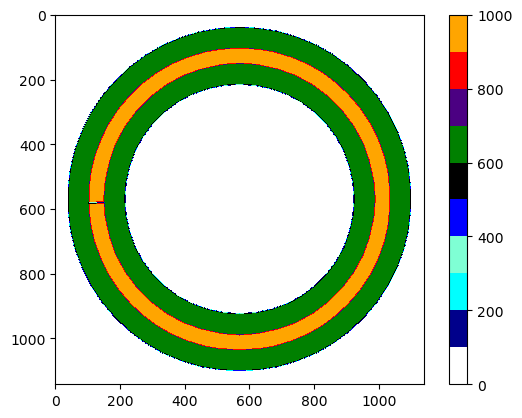

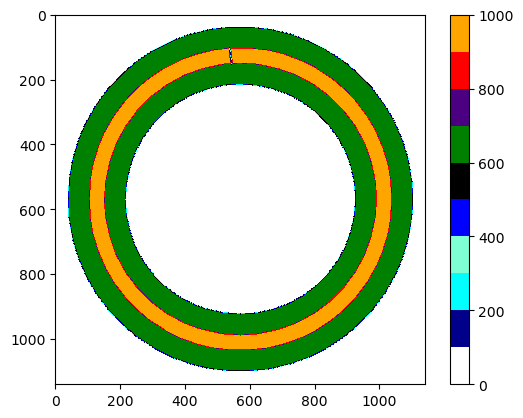

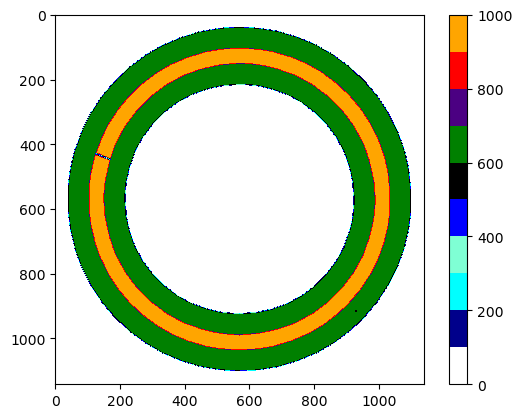

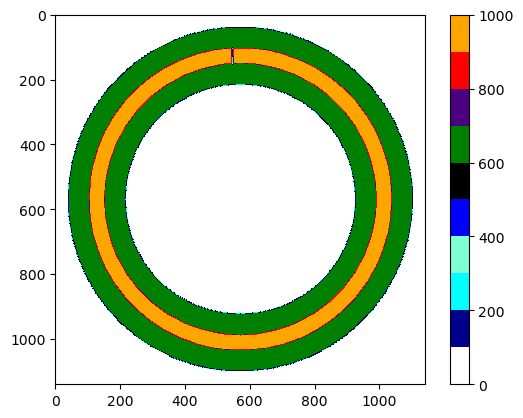

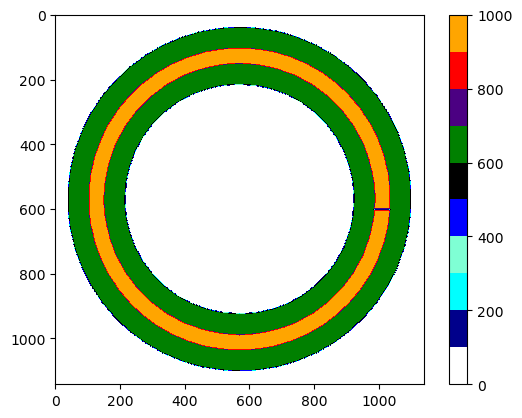

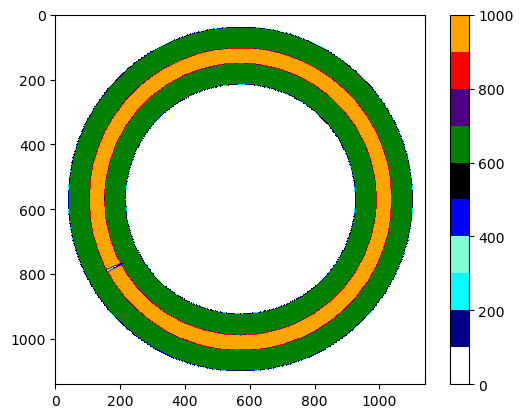

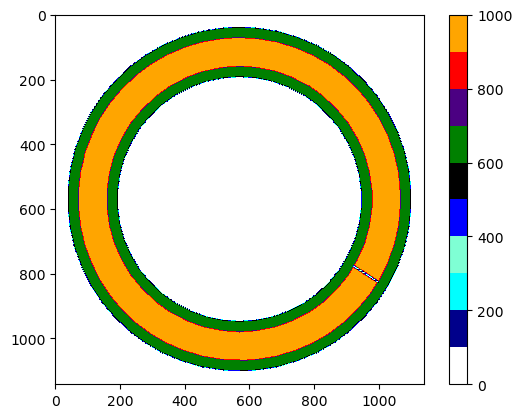

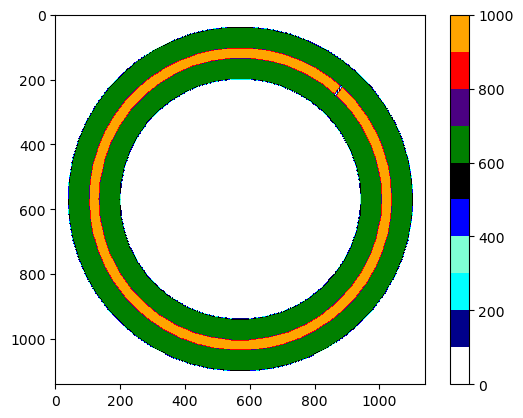

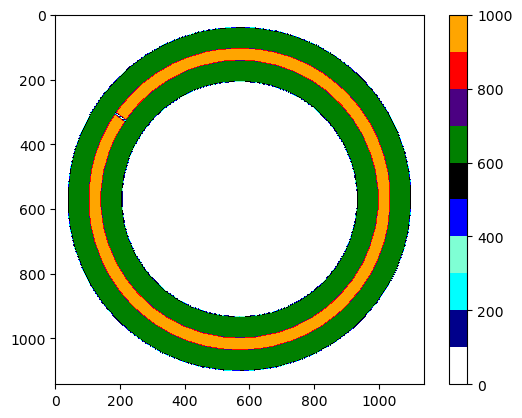

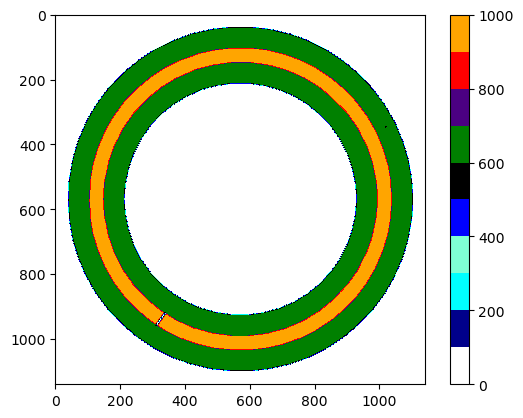

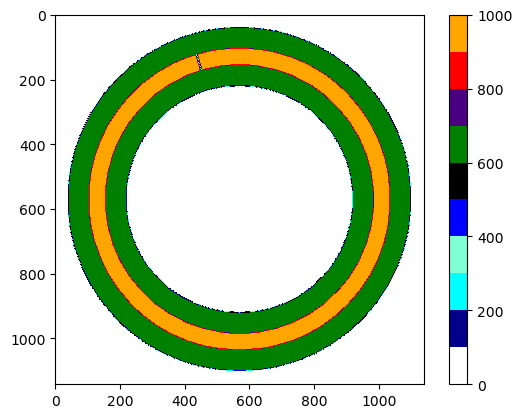

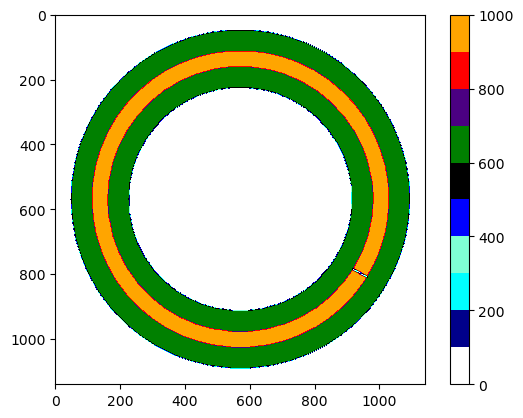

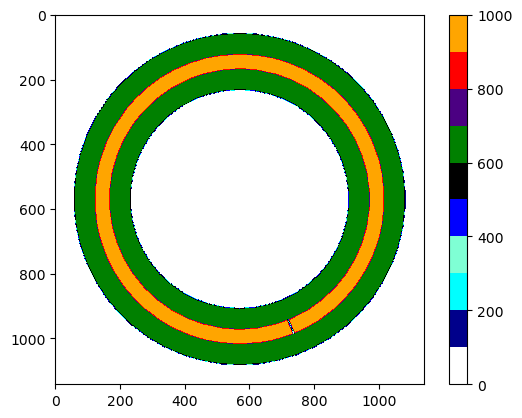

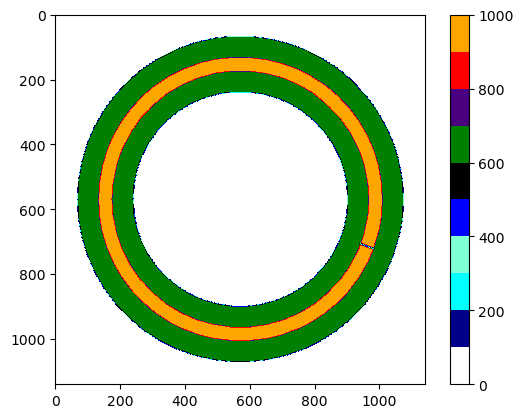

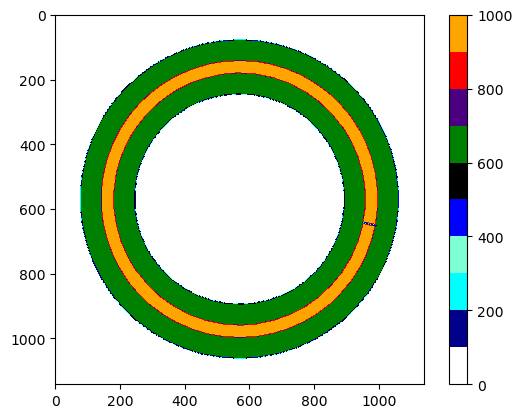

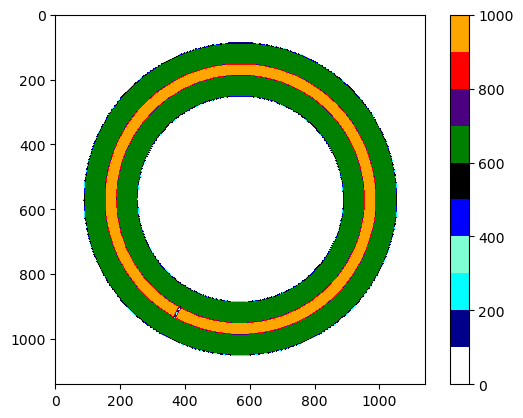

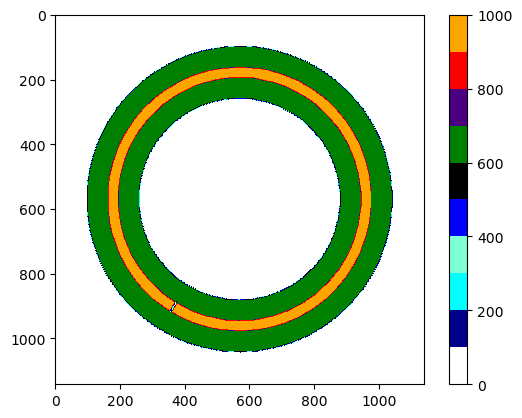

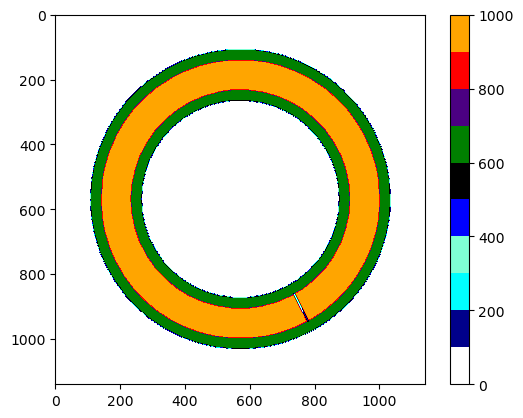

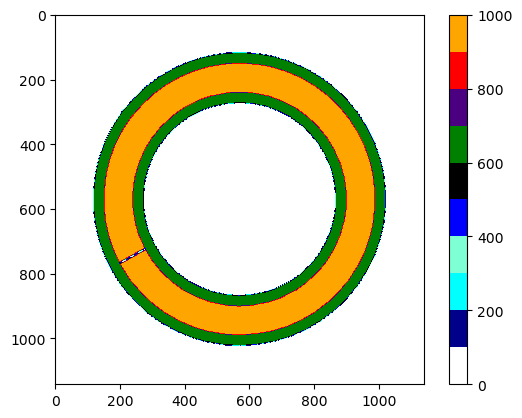

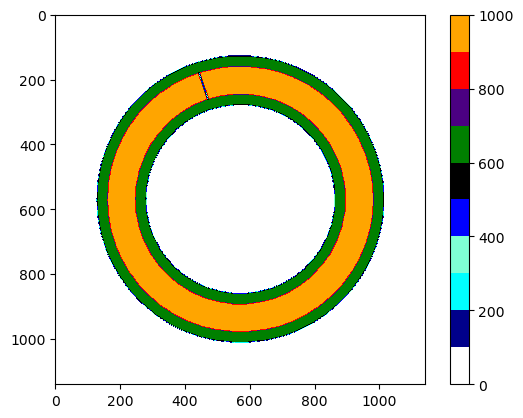

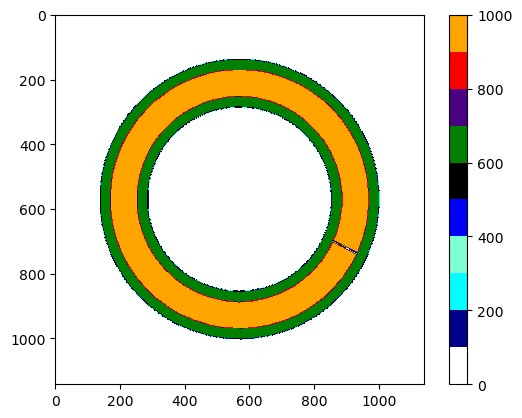

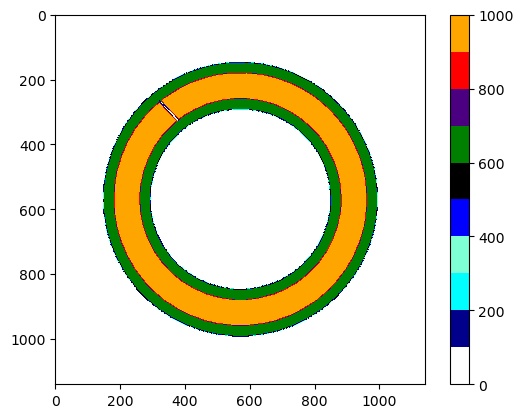

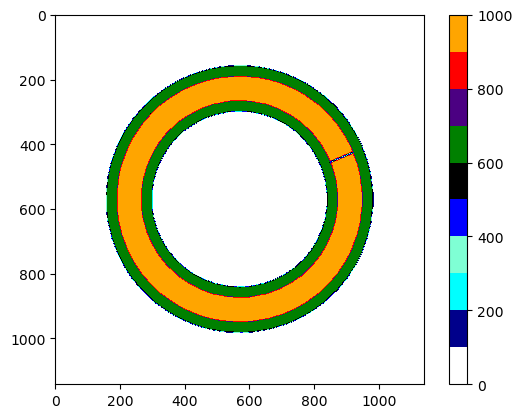

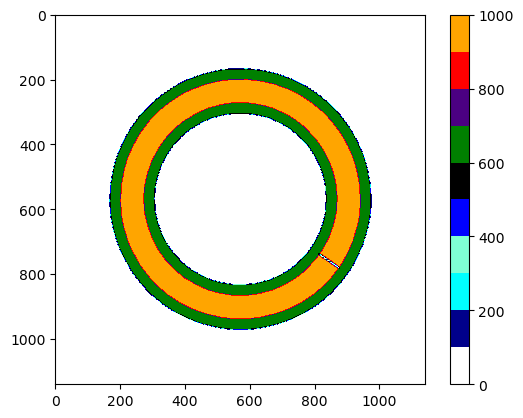

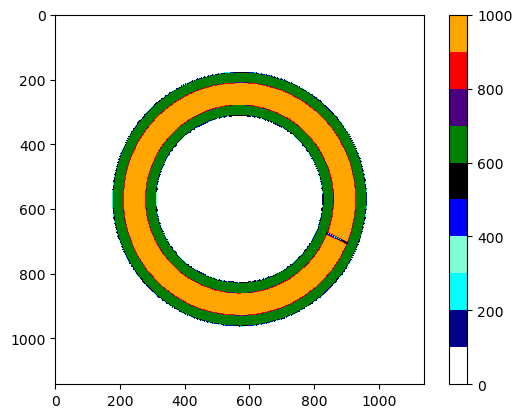

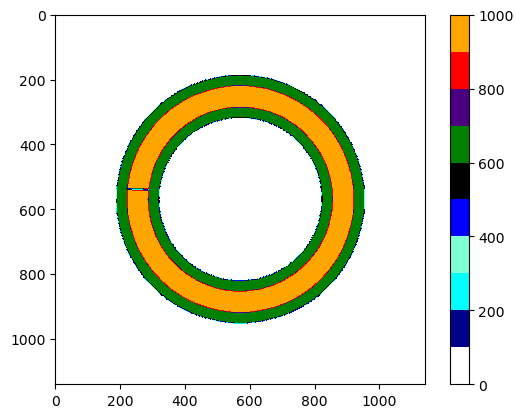

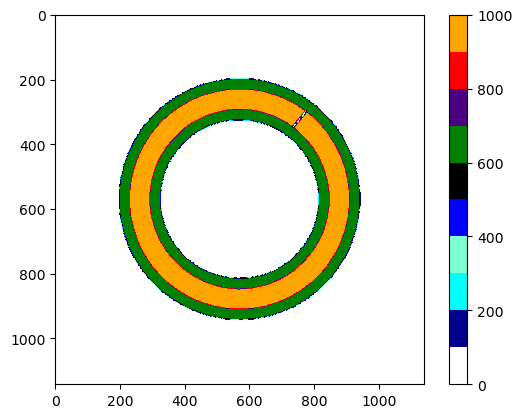

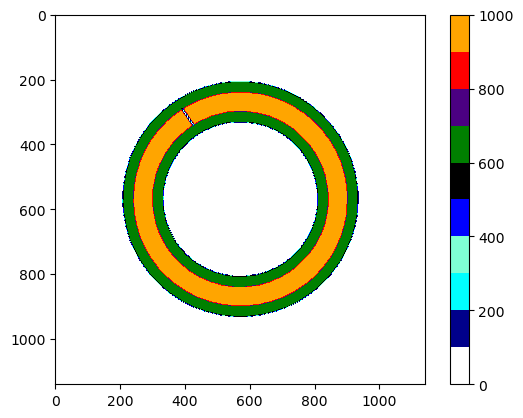

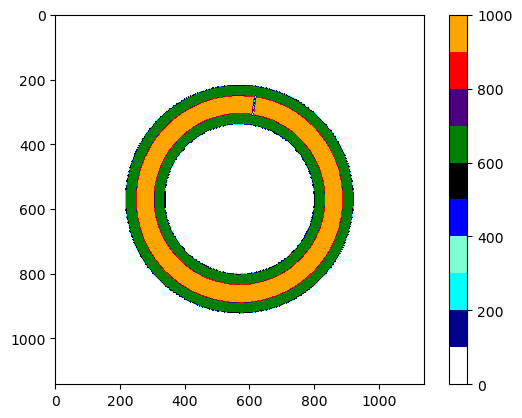

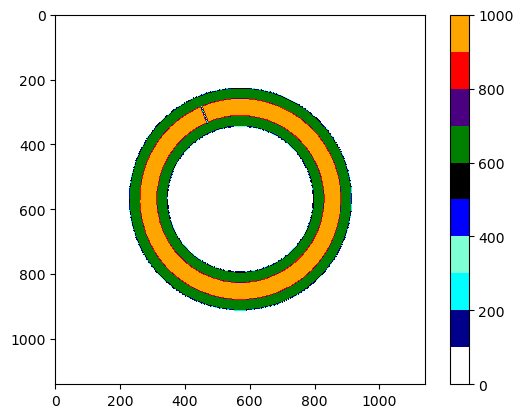

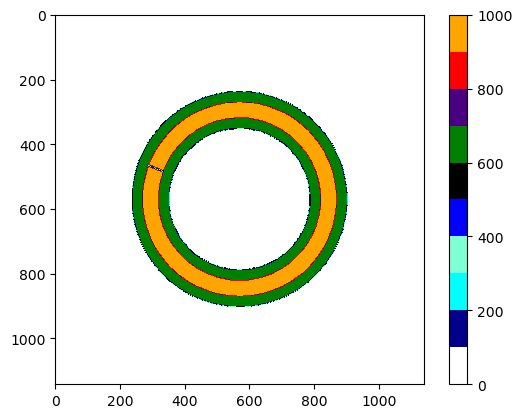

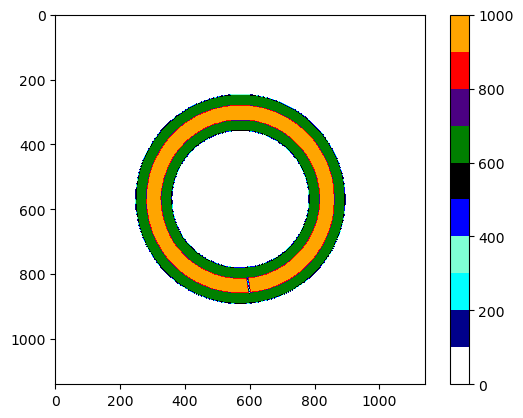

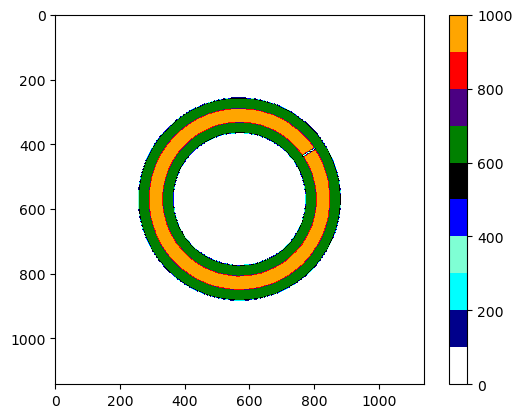

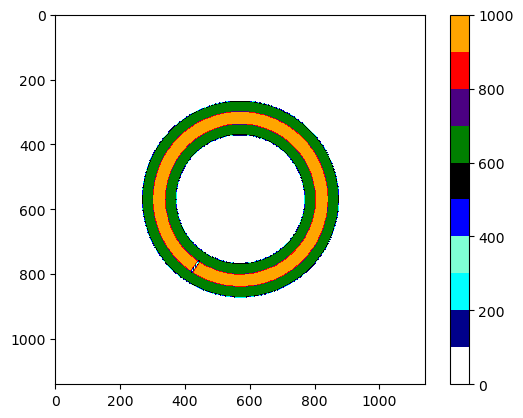

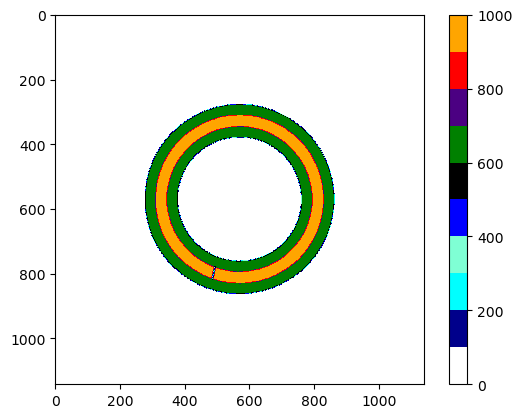

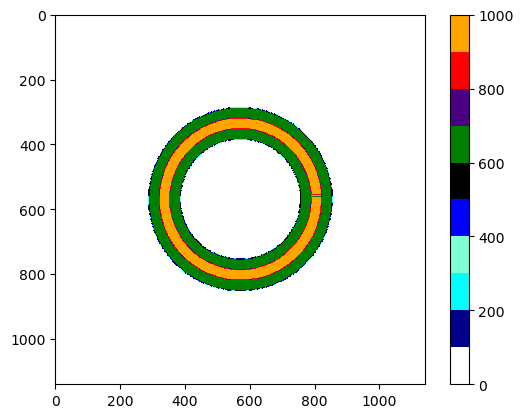

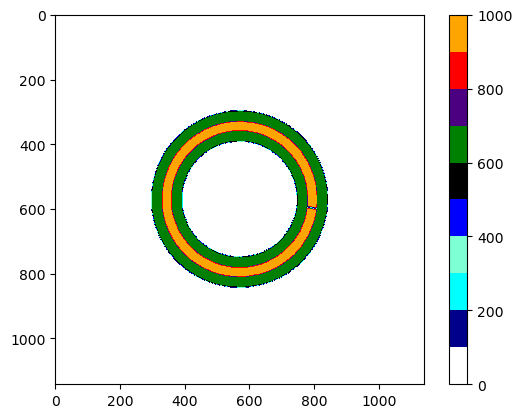

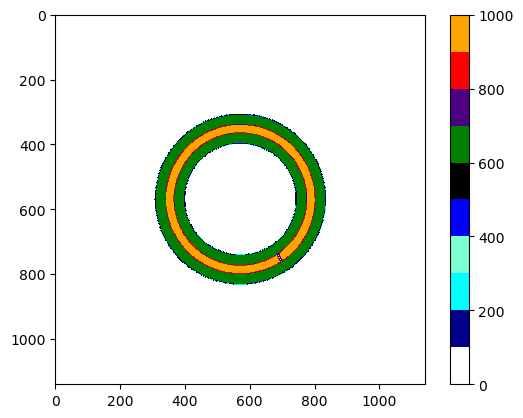

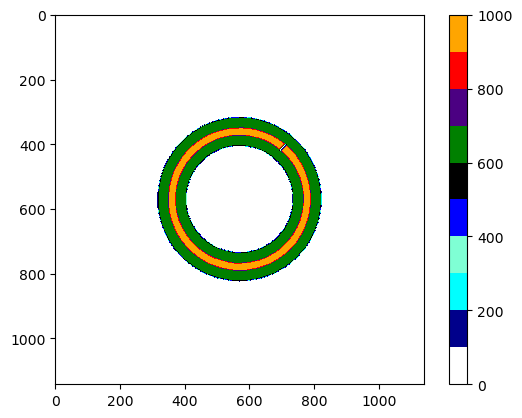

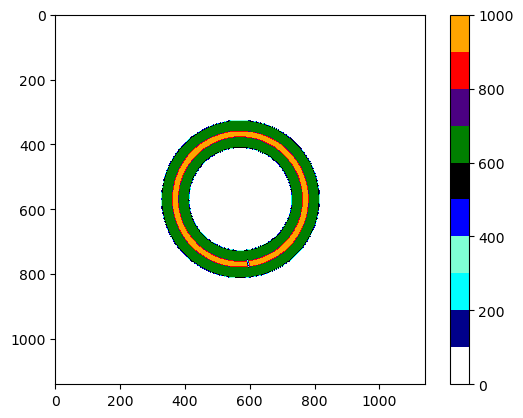

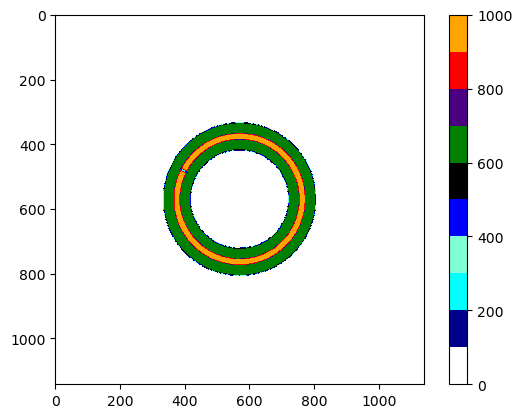

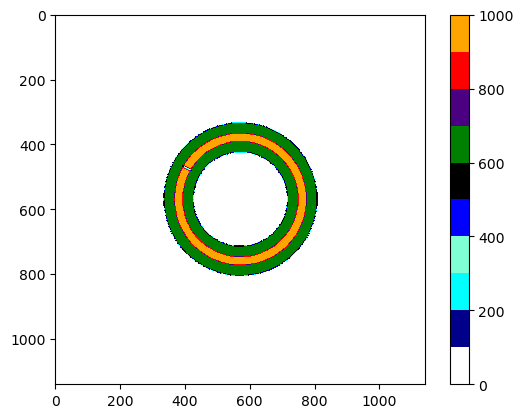

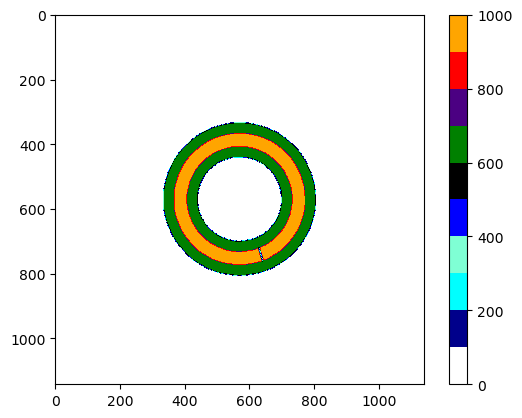

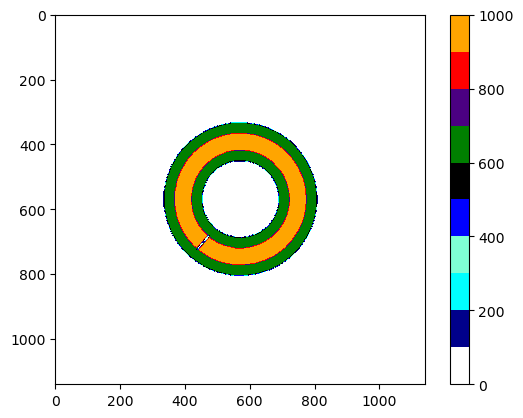

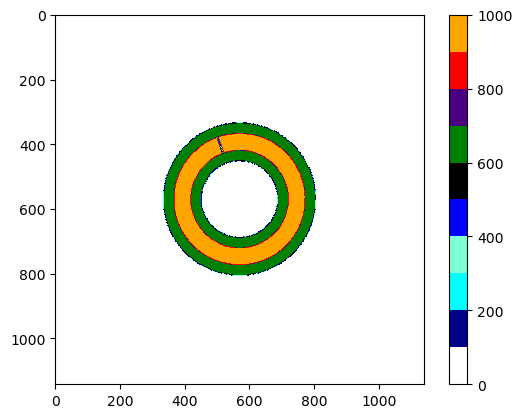

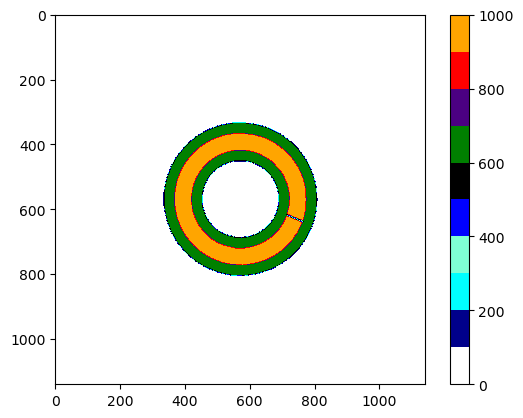

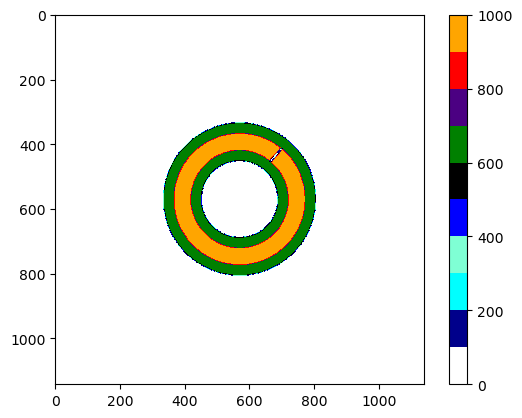

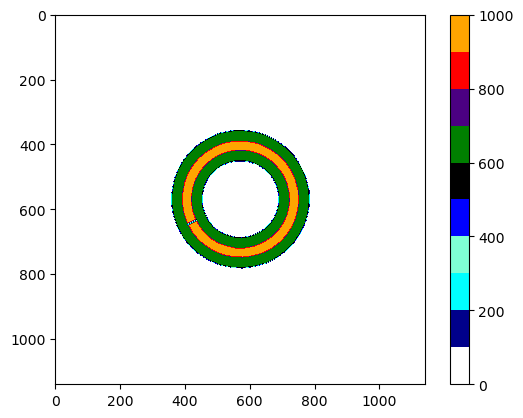

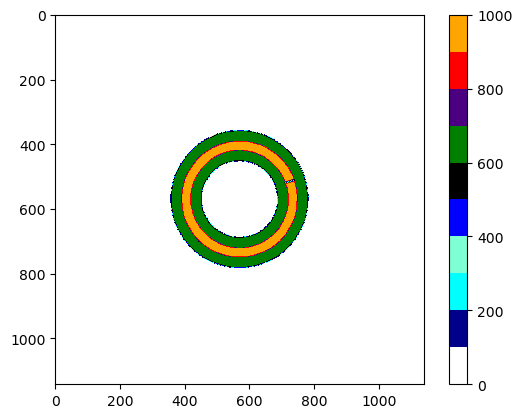

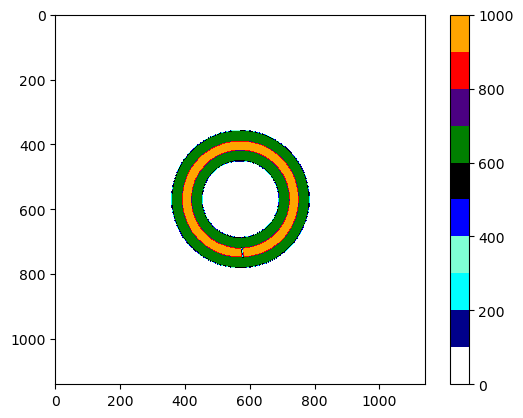

In [ ]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        # if i%2 == 1:
        #     img_mapping = it.rotate_img_ccw(img_mapping )
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12091922760009766
Total de [Making offset routes] : 5.132338762283325
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08315491676330566
Total de [Making offset routes] : 3.7650272846221924
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12673425674438477
Total de [Making offset routes] : 3.844480514526367
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06222891807556152
Total de [Making offset routes] : 3.508521556854248
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.09865856170654297
Total de [Making offset routes] : 3.346487522125244
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12329649925231934
Total de [Making offset routes] : 2.993577241897583
Making offset routes
salvando imagens d

Rotas de pontes

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00015807151794433594
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 5.626678466796875e-05
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 14.958390235900879
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.140869140625
Total de [Camada: L_000] : 15.277490377426147
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.0003058910369873047
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 7.605552673339844e-05
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 25.946458339691162
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.3177623748779297
Total de [Camada: L_001] : 26.692649602890015
Camada: L_002
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00034165382385253906
Making Zigzag bri

Rotas de Ziguezague

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.002399921417236328
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.010226726531982422
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.005089759826660156
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.003172636032104492
salvando grafos
Total de [salvando grafos] : 0.09407806396484375
Total de [Making zigzag routes] : 1.0330498218536377
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.0012116432189941406
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.010264396667480469
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0026412010192871094
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0028803348541259766

WEAVING

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 2.62860369682312
salvando rotas


deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.22425389289855957
Total de [Fase 5 b] : 2.8542349338531494
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 2.5271224975585938
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.2352147102355957
Total de [Fase 5 b] : 2.7630178928375244
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 2.295304298400879
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.21727514266967773
Total de [Fase 5 b] : 2.5147593021392822
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 2.5711829662323
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.21512794494628906
Total de [Fase 5 b] : 2.7876505851745605
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] :

Rotas de Thin Walls

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.06601190567016602
salvando imagens das rotas
Total de [salvando imagens das rotas] : 8.58306884765625e-06
Total de [Making thin walls routes] : 0.06643366813659668
Total de [Fase 5] : 0.06685304641723633
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.054601192474365234
salvando imagens das rotas
Total de [salvando imagens das rotas] : 1.3113021850585938e-05
Total de [Making thin walls routes] : 0.05516839027404785
Total de [Fase 5] : 0.05519556999206543
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.052731990814208984
salvando imagens das rotas
Total de [salvando imagens das rotas] : 8.821487426757812e-06
Total de [Making thin walls routes] : 0.053846120834350586
Total de [Fase 5] : 0.05395221710205078
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.0693826675415039
salvando imagens das rotas
Total de [salv

Encontrando o lugar onde será o começo da trilha de cada ilha

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.002460956573486328
Total de [Encontrando ponto de união ext-int] : 0.018654346466064453
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.002249479293823242
Total de [Encontrando ponto de união ext-int] : 0.014800310134887695
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0017528533935546875
Total de [Encontrando ponto de união ext-int] : 0.02393507957458496
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.00232696533203125
Total de [Encontrando ponto de união ext-int] : 0.018648624420166016
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0014297962188720703
Total de [Encontrando ponto de união ext-int] : 0.013488292694091797
Encontrando ponto de união ext-int
salva

Unificando rotas EXTERNAS nas camadas

In [1]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.30959272384643555
Conectando pontes de Crossover
Value(False)
salto:  [491, 679]
Total de [Conectando pontes de Crossover] : 27.43302035331726
Total de [Conectando rotas externas] : 30.985357999801636
salvando imagens das rotas
deletado: /L_043/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.17312264442443848
Total de [Fase 6] : 31.16539740562439
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.2927544116973877
Conectando pontes de Crossover
salto:  [670, 480]
Total de [Conectando pontes de Crossover] : 32.60997796058655
Total de [Conectando rotas externas] : 35.1903920173645
salvando imagens das rotas
deletado: /L_044/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.1817624568939209
Total de [Fase 6] : 35.373472929000854
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de 

Unificando rotas INTERNAS nas camadas

In [2]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0008056163787841797
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_043/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.022231578826904297
Total de [Fase 7] : 0.2531120777130127
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0009274482727050781
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_044/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.01729583740234375
Total de [Fase 7] : 0.2631795406341553
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0008952617645263672
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_045/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.01941823959350586
Total de [Fase 7] : 0.2712106704711914
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0009524822235107422
rotas internas inexisten

Unindo rotas de thin walls

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0009484291076660156
salvando imagens das rotas
deletado: /L_043/I_000/thinwalls_tree_route/sequence
deletado: /L_043/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.09767532348632812
Total de [Fase 8] : 0.13659191131591797
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0014688968658447266
salvando imagens das rotas
deletado: /L_044/I_000/thinwalls_tree_route/sequence
deletado: /L_044/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.10135746002197266
Total de [Fase 8] : 0.1434791088104248
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0019516944885253906
salvando imagens das rotas
deletado: /L_045/I_000/thinwalls_tree_route/sequence
deletado: /L_045/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.09798359870910645
Total de [Fase 8] : 0.13879942893981934
Fase 8
Convertendo paredes

Unindo todas as rotas

In [4]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.0002753734588623047
Conectando todas as partes
layer rotacionada
Total de [Conectando todas as partes] : 0.051966190338134766
salvando imagens das rotas
deletado: /L_043/I_000/island_route
[[385, 454], [386, 453], [386, 452], [388, 450], [388, 449], [390, 447], [390, 446], [392, 444], [392, 443], [395, 440], [395, 439], [397, 437], [397, 436], [399, 434], [399, 433], [402, 430], [402, 429], [413, 418], [413, 417], [428, 402], [429, 402], [432, 399], [433, 399], [436, 396], [437, 396], [440, 393], [441, 393], [444, 390], [445, 390], [448, 387], [449, 387], [451, 385], [452, 385], [454, 383], [455, 383], [456, 382], [457, 382], [458, 381], [459, 381], [460, 380], [461, 380], [463, 378], [464, 378], [465, 377], [466, 377], [468, 375], [469, 375], [470, 374], [471, 374], [472, 373], [473, 373], [474, 372], [475, 372], [478, 370], [480, 370], [481, 369], [482, 369], [485, 367], [487, 367], [488, 366], [489,

Gerando o Código G

In [5]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, p_religamento, p_desligamento, vel_vazio, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [20+8+2+(i*1.5) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               vel_vazio,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_043/I_000
[[385, 454], [386, 453], [386, 452], [388, 450], [388, 449], [390, 447], [390, 446], [392, 444], [392, 443], [395, 440], [395, 439], [397, 437], [397, 436], [399, 434], [399, 433], [402, 430], [402, 429], [413, 418], [413, 417], [428, 402], [429, 402], [432, 399], [433, 399], [436, 396], [437, 396], [440, 393], [441, 393], [444, 390], [445, 390], [448, 387], [449, 387], [451, 385], [452, 385], [454, 383], [455, 383], [456, 382], [457, 382], [458, 381], [459, 381], [460, 380], [461, 380], [463, 378], [464, 378], [465, 377], [466, 377], [468, 375], [469, 375], [470, 374], [471, 374], [472, 373], [473, 373], [474, 372], [475, 372], [478, 370], [480, 370], [481, 369], [482, 369], [485, 367], [487, 367], [488, 366], [489, 366], [490, 365], [491, 365], [494, 363], [496, 363], [497, 362], [500, 362], [503, 360], [505, 360], [506, 359], [508, 359], [509, 358], [511, 358], [512, 357], [514, 357], [515, 356], [518, 356], [519, 355], [523, 355], [524, 354], [528

In [6]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [7]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [8]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [9]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [10]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)